In [1]:
import itertools
import scipy.stats
import scipy.spatial.distance
import random
import os.path
import numpy as np
import pandas as pd
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches
sns.set(font_scale=2)
sns.set_style("white")
%matplotlib inline

In [2]:
from sklearn import preprocessing
from sklearn.preprocessing import Imputer
from sklearn import decomposition

In [20]:
lfmm_dom_in = pd.read_csv(os.path.join('results','batch_4','LFMM','complete.dom.lfmm'),sep = ' ', header = None)
lfmm_dom_in.columns = [x+1 for x in lfmm_dom_in.columns]
print lfmm_dom_in.shape
lfmm_dom_in.head()

(174, 35579)


,1,2,3,4,5,6,7,8,9,10,...,35570,35571,35572,35573,35574,35575,35576,35577,35578,35579
0,1,1,1,1,1,1,1,1,0,1,...,1,0,0,1,0,1,0,1,0,0
1,0,1,1,1,1,1,1,0,0,1,...,9,9,0,1,0,1,0,1,0,0
2,0,1,1,1,1,1,1,1,0,1,...,1,0,0,1,0,1,9,9,9,9
3,0,1,1,1,1,1,1,0,0,1,...,1,0,0,1,9,9,0,0,1,0
4,0,1,0,1,0,1,1,1,0,1,...,1,0,0,1,0,1,9,9,9,9


#### replace 9 with missing

In [22]:
allele_matrix = lfmm_dom_in.replace(9, np.nan)

In [24]:
allele_matrix.head()

,1,2,3,4,5,6,7,8,9,10,...,35570,35571,35572,35573,35574,35575,35576,35577,35578,35579
0,1,1,1,1,1,1,1,1,0,1,...,1,0,0,1,0,1,0,1,0,0
1,0,1,1,1,1,1,1,0,0,1,...,NaN,NaN,0,1,0,1,0,1,0,0
2,0,1,1,1,1,1,1,1,0,1,...,1,0,0,1,0,1,NaN,NaN,NaN,NaN
3,0,1,1,1,1,1,1,0,0,1,...,1,0,0,1,NaN,NaN,0,0,1,0
4,0,1,0,1,0,1,1,1,0,1,...,1,0,0,1,0,1,NaN,NaN,NaN,NaN


## add pop info

In [311]:
ped_genotypes = '/home/ipseg/Desktop/waples/chum_populations/data/batch_4/pop_genotypes/complete.ped'
ped_genotypes = pd.read_csv(ped_genotypes, sep = ' ', header = None)
ped_genotypes = ped_genotypes.iloc[:,:2]
ped_genotypes.columns = ['pop', 'ind']
ped_genotypes.head()

,pop,ind
0,1,CMHAMM10_0002
1,1,CMHAMM10_0005
2,1,CMHAMM10_0008
3,1,CMHAMM10_0011
4,1,CMHAMM10_0012


In [312]:
dom_calls = pd.merge(ped_genotypes[['pop']], allele_matrix, left_index=True, right_index=True)

In [313]:
dom_calls.head()

,pop,1,2,3,4,5,6,7,8,9,...,35570,35571,35572,35573,35574,35575,35576,35577,35578,35579
0,1,1,1,1,1,1,1,1,1,0,...,1,0,0,1,0,1,0,1,0,0
1,1,0,1,1,1,1,1,1,0,0,...,NaN,NaN,0,1,0,1,0,1,0,0
2,1,0,1,1,1,1,1,1,1,0,...,1,0,0,1,0,1,NaN,NaN,NaN,NaN
3,1,0,1,1,1,1,1,1,0,0,...,1,0,0,1,NaN,NaN,0,0,1,0
4,1,0,1,0,1,0,1,1,1,0,...,1,0,0,1,0,1,NaN,NaN,NaN,NaN


In [314]:
linkage_map = pd.read_csv('/home/ipseg/Desktop/waples/chum_populations/linkage_map/LEPmap/with_paralogs/final/PS_chum_map_2015.txt',sep = '\t')
linkage_map['paralog'] = ['_' in xx for xx in linkage_map['resolved_locus']]

linkage_map = linkage_map.drop_duplicates(subset =['resolved_locus'])
linkage_map.head()


,contig,resolved_locus,stacks_CatID,stacks_SNP,LEPname,LEP_LG,cM_OLD,paper1_LG,cM,paralog
0,c4311,4311,28282,28282_88,4584,1,0,1,0,False
2,c56875,56875,39970,39970_17,7377,1,0,1,0,False
6,c54045,54045,37579,37579_17,6722,1,0,1,0,False
12,c2167,2167,10293,10293_9,1923,1,0,1,0,False
14,c69918,69918,50820,50820_7,10017,1,0,1,0,False


In [315]:
complete_dom_map = pd.read_csv(os.path.join('results','batch_4','EIGENSOFT','complete.dom.map'),sep = '\t', header = None)
complete_dom_map.columns = ['junkLG', 'domID', 'junk1', 'junk2']
complete_dom_map['stacks_CatID'] = [np.int(x.split('_')[0]) for x in complete_dom_map['domID']]
complete_dom_map['LFMM_ID'] = range(1, len(complete_dom_map)+1)
complete_dom_map.head()

,junkLG,domID,junk1,junk2,stacks_CatID,LFMM_ID
0,1,2_A,1,1,2,1
1,1,2_G,1,1,2,2
2,1,7_GG,1,1,7,3
3,1,7_TA,1,1,7,4
4,1,7_TG,1,1,7,5


could try this with differnt subsets of loci

In [316]:
on_map = pd.merge(complete_dom_map, linkage_map)
LFMM_ID_paralogs = on_map[on_map['paralog']==True]['LFMM_ID'].tolist()
LFMM_ID_nonparalogs = on_map[on_map['paralog']==False]['LFMM_ID'].tolist()

In [317]:
len(LFMM_ID_nonparalogs) ,len(LFMM_ID_paralogs)

(14992, 4758)

In [318]:
nonparalog_calls = dom_calls[LFMM_ID_nonparalogs]
paralog_calls = dom_calls[LFMM_ID_paralogs]

## example

In [369]:
dom_calls.iloc[:20,:]

,pop,1,2,3,4,5,6,7,8,9,...,35570,35571,35572,35573,35574,35575,35576,35577,35578,35579
0,1,1,1,1,1,1,1,1,1,0,...,1,0,0,1,0,1,0,1,0,0
1,1,0,1,1,1,1,1,1,0,0,...,NaN,NaN,0,1,0,1,0,1,0,0
2,1,0,1,1,1,1,1,1,1,0,...,1,0,0,1,0,1,NaN,NaN,NaN,NaN
3,1,0,1,1,1,1,1,1,0,0,...,1,0,0,1,NaN,NaN,0,0,1,0
4,1,0,1,0,1,0,1,1,1,0,...,1,0,0,1,0,1,NaN,NaN,NaN,NaN
5,1,NaN,NaN,0,1,0,1,1,0,1,...,1,0,0,1,0,1,0,0,0,1
6,1,NaN,NaN,1,1,0,1,0,1,1,...,0,1,0,1,0,1,0,0,0,1
7,1,1,1,1,1,1,1,1,0,0,...,1,0,0,1,0,1,0,0,1,1
8,1,0,1,0,1,0,1,1,0,1,...,1,0,0,1,1,1,0,0,0,1
9,1,0,1,0,1,0,1,1,0,1,...,1,1,1,0,0,1,0,1,0,0


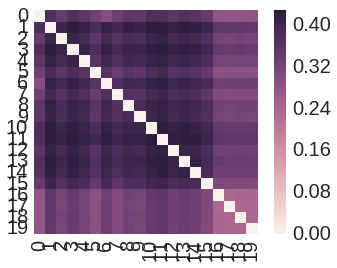

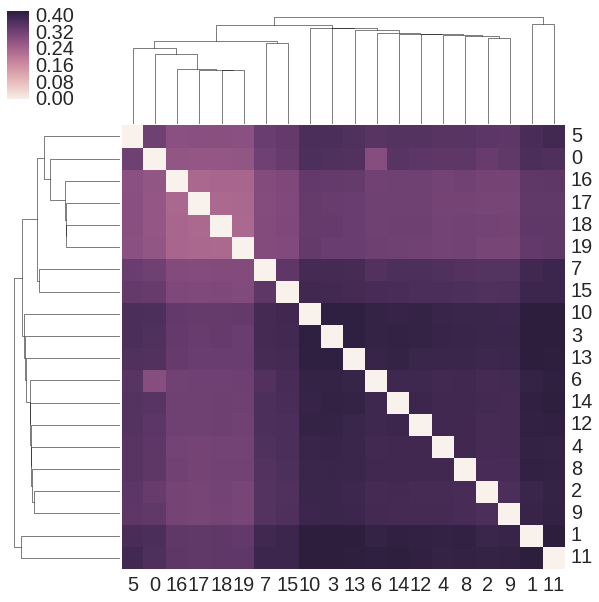

In [372]:
#scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(, 'hamming'))
long_dist = scipy.spatial.distance.pdist(dom_calls.iloc[:20,1:], 'hamming')
sq_dist = scipy.spatial.distance.squareform(long_dist)
sns.heatmap(sq_dist, square=True, robust = True)
sns.clustermap(sq_dist, square=True, robust = True)

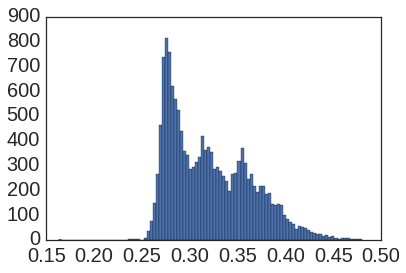

In [344]:
plt.hist(long_dist, bins = 100)
plt.show()

## for paralog and non paralogs

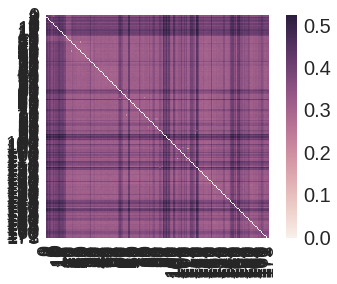

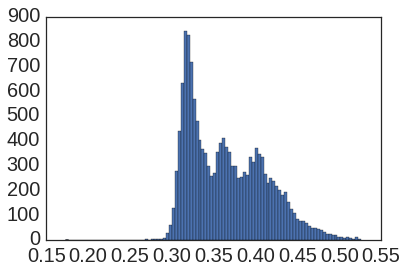

In [347]:
nonparalog_long_dist = scipy.spatial.distance.pdist(nonparalog_calls, 'hamming')
nonparalog_sq_dist = scipy.spatial.distance.squareform(nonparalog_long_dist)
sns.heatmap(nonparalog_sq_dist, square=True, robust = False)
plt.show()
plt.hist(nonparalog_long_dist, bins = 100)
plt.show()

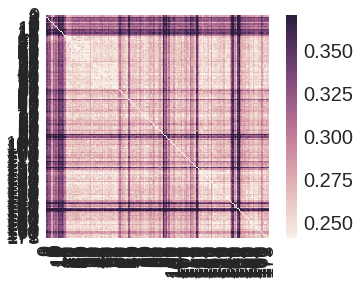

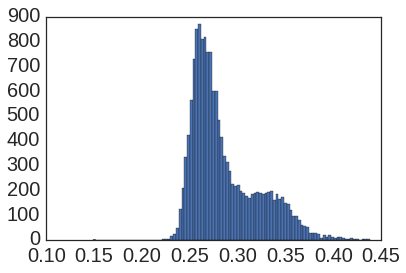

In [346]:
paralog_long_dist = scipy.spatial.distance.pdist(paralog_calls, 'hamming')
paralog_sq_dist = scipy.spatial.distance.squareform(paralog_long_dist)
sns.heatmap(paralog_sq_dist, square=True, robust = True)
plt.show()
plt.hist(paralog_long_dist, bins = 100)
plt.show()

In [323]:
nonparalog_df = pd.DataFrame(nonparalog_sq_dist)
nonparalog_df.index = ([dom_calls['pop'].tolist(), dom_calls.index])
nonparalog_df.columns = nonparalog_df.index
nonparalog_df.head()

1                                                               \
          0         1         2         3         4         5         6     
1 0  0.000000  0.430830  0.390008  0.423359  0.405816  0.375200  0.332644   
  1  0.430830  0.000000  0.449573  0.475587  0.461980  0.425694  0.464781   
  2  0.390008  0.449573  0.000000  0.451641  0.435832  0.403882  0.439568   
  3  0.423359  0.475587  0.451641  0.000000  0.454376  0.428695  0.462113   
  4  0.405816  0.461980  0.435832  0.454376  0.000000  0.408418  0.445237   

                                     ...           9                   10  \
          7         8         9      ...          164       165       166   
1 0  0.374800  0.402748  0.399747    ...     0.365195  0.358258  0.379002   
  1  0.441702  0.461313  0.454576    ...     0.433565  0.432431  0.443103   
  2  0.417223  0.433098  0.424760    ...     0.403082  0.392676  0.418023   
  3  0.441169  0.453975  0.453108    ...     0.426561  0.426961  0.439501   
  4  0.422359  0.445638  0.432697    ...     0.411086  0.408618  0.424293   

                                                                           
          167       168       169       170       171       172       173  
1 0  0.374800  0.406283  0.400213  0.375934  0.370598  0.368530  0.371265  
  1  0.438834  0.463914  0.461646  0.442236  0.439501  0.432631  0.433031  
  2  0.414221  0.439501  0.436033  0.418623  0.405483  0.402615  0.404349  
  3  0.438901  0.460446  0.461846  0.442903  0.439901  0.429629  0.427828  
  4  0.421892  0.445237  0.442503  0.418957  0.411553  0.414888  0.414755  

[5 rows x 174 columns]

In [324]:
paralog_df = pd.DataFrame(paralog_sq_dist)
paralog_df.index = ([dom_calls['pop'].tolist(), dom_calls.index])
paralog_df.columns = paralog_df.index
paralog_df.head()

1                                                               \
          0         1         2         3         4         5         6     
1 0  0.000000  0.339008  0.315469  0.317991  0.320933  0.277217  0.269021   
  1  0.339008  0.000000  0.361707  0.368012  0.378941  0.328289  0.367802   
  2  0.315469  0.361707  0.000000  0.360656  0.360235  0.313577  0.365280   
  3  0.317991  0.368012  0.360656  0.000000  0.374737  0.318201  0.355822   
  4  0.320933  0.378941  0.360235  0.374737  0.000000  0.305591  0.350357   

                                     ...           9                   10  \
          7         8         9      ...          164       165       166   
1 0  0.295923  0.319462  0.310004    ...     0.274065  0.273855  0.274695   
  1  0.354981  0.369693  0.356452    ...     0.332493  0.336276  0.339639   
  2  0.342161  0.350357  0.332282    ...     0.319042  0.318201  0.334805   
  3  0.338798  0.364439  0.352249    ...     0.325557  0.323245  0.335015   
  4  0.326608  0.353300  0.343001    ...     0.308953  0.316940  0.324296   

                                                                           
          167       168       169       170       171       172       173  
1 0  0.276587  0.314628  0.299496  0.286465  0.277427  0.286045  0.272594  
  1  0.352249  0.380202  0.344893  0.336906  0.348466  0.347625  0.346784  
  2  0.316730  0.352459  0.338798  0.325557  0.329971  0.333964  0.337327  
  3  0.326398  0.360025  0.344472  0.319252  0.341320  0.335435  0.341320  
  4  0.321354  0.357713  0.342371  0.328289  0.324086  0.316099  0.325977  

[5 rows x 174 columns]

In [397]:
import collections


In [439]:
def get_within_pop_div(pdist_df):
    within = collections.OrderedDict()
    for xx in range(1,11):
        within_pdist_vals = pdist_df.loc[xx,[xx]].values
        np.fill_diagonal(within_pdist_vals,np.NaN)
        within[xx] = np.nanmean(within_pdist_vals)
    return(within)

In [440]:
get_within_pop_div(nonparalog_df)

OrderedDict([(1, 0.40755280008987249),
             (2, 0.31087756607445544),
             (3, 0.31039747514463856),
             (4, 0.34369970435845354),
             (5, 0.39528178469377218),
             (6, 0.31214344620161055),
             (7, 0.32728590779551292),
             (8, 0.42550312547644464),
             (9, 0.34187977177571627),
             (10, 0.36758414011282209)])

In [441]:
get_within_pop_div(paralog_df)

OrderedDict([(1, 0.32861772969624564),
             (2, 0.24881314442548769),
             (3, 0.24821242892856354),
             (4, 0.27362828648524051),
             (5, 0.29623633314802006),
             (6, 0.25132026443501854),
             (7, 0.25461570795744815),
             (8, 0.3574956464300727),
             (9, 0.25930147336200299),
             (10, 0.27255599591665164)])

In [450]:
def get_between_pop_div(pdist_df):
    between = collections.OrderedDict()
    for xx in range(1,11):
        for yy in range(xx+1,11):
            between_pdist_vals = pdist_df.loc[yy,[xx]]
            between[xx,yy] = np.nanmean(between_pdist_vals)
    return(between)

In [451]:
get_between_pop_div(nonparalog_df).items()

[((1, 2), 0.38728243298386594),
 ((1, 3), 0.38369730522945572),
 ((1, 4), 0.39672043840048027),
 ((1, 5), 0.42171276293593146),
 ((1, 6), 0.38556139031726017),
 ((1, 7), 0.39186232657417291),
 ((1, 8), 0.43942644410352188),
 ((1, 9), 0.39905847221082008),
 ((1, 10), 0.40681321704909285),
 ((2, 3), 0.32266797193797475),
 ((2, 4), 0.33800244934553331),
 ((2, 5), 0.36588634748146515),
 ((2, 6), 0.32264551789474888),
 ((2, 7), 0.33022626072841088),
 ((2, 8), 0.38533050960512272),
 ((2, 9), 0.33890624019084692),
 ((2, 10), 0.35024807348232784),
 ((3, 4), 0.33503503952107794),
 ((3, 5), 0.36318025527593212),
 ((3, 6), 0.32125891384495975),
 ((3, 7), 0.32577612822076535),
 ((3, 8), 0.38257737459978658),
 ((3, 9), 0.33564285567687385),
 ((3, 10), 0.33935598986125937),
 ((4, 5), 0.37119306372000549),
 ((4, 6), 0.33227437208935678),
 ((4, 7), 0.34442759352607105),
 ((4, 8), 0.39867356340048032),
 ((4, 9), 0.35287089011575407),
 ((4, 10), 0.3618747707110459),
 ((5, 6), 0.35989634354353606),
 ((5,

In [452]:
get_between_pop_div(paralog_df)

OrderedDict([((1, 2), 0.30434747669559625),
             ((1, 3), 0.30366225304749894),
             ((1, 4), 0.31521549232870955),
             ((1, 5), 0.32699901015606991),
             ((1, 6), 0.30423592800641985),
             ((1, 7), 0.30670149522608536),
             ((1, 8), 0.35658233501471204),
             ((1, 9), 0.30948847285543379),
             ((1, 10), 0.31515999369482978),
             ((2, 3), 0.25546942610587742),
             ((2, 4), 0.2680477771184136),
             ((2, 5), 0.28099244416474639),
             ((2, 6), 0.25671371380146696),
             ((2, 7), 0.25904712452446299),
             ((2, 8), 0.31679307914843108),
             ((2, 9), 0.26137070406783336),
             ((2, 10), 0.26774874514749158),
             ((3, 4), 0.26681674285414037),
             ((3, 5), 0.27985532007213654),
             ((3, 6), 0.25579502464748366),
             ((3, 7), 0.25696270942172583),
             ((3, 8), 0.31379387347625054),
             ((3, 9), 0.2601303

In [434]:
#get_between_pop_div(nonparalog_df).values()

In [453]:
get_between_pop_div(nonparalog_df).items()

[((1, 2), 0.38728243298386594),
 ((1, 3), 0.38369730522945572),
 ((1, 4), 0.39672043840048027),
 ((1, 5), 0.42171276293593146),
 ((1, 6), 0.38556139031726017),
 ((1, 7), 0.39186232657417291),
 ((1, 8), 0.43942644410352188),
 ((1, 9), 0.39905847221082008),
 ((1, 10), 0.40681321704909285),
 ((2, 3), 0.32266797193797475),
 ((2, 4), 0.33800244934553331),
 ((2, 5), 0.36588634748146515),
 ((2, 6), 0.32264551789474888),
 ((2, 7), 0.33022626072841088),
 ((2, 8), 0.38533050960512272),
 ((2, 9), 0.33890624019084692),
 ((2, 10), 0.35024807348232784),
 ((3, 4), 0.33503503952107794),
 ((3, 5), 0.36318025527593212),
 ((3, 6), 0.32125891384495975),
 ((3, 7), 0.32577612822076535),
 ((3, 8), 0.38257737459978658),
 ((3, 9), 0.33564285567687385),
 ((3, 10), 0.33935598986125937),
 ((4, 5), 0.37119306372000549),
 ((4, 6), 0.33227437208935678),
 ((4, 7), 0.34442759352607105),
 ((4, 8), 0.39867356340048032),
 ((4, 9), 0.35287089011575407),
 ((4, 10), 0.3618747707110459),
 ((5, 6), 0.35989634354353606),
 ((5,

In [454]:
bb = scipy.spatial.distance.squareform(get_between_pop_div(nonparalog_df).values())
np.fill_diagonal(bb,get_within_pop_div(nonparalog_df).values())

In [455]:
pd.DataFrame(bb)

,0,1,2,3,4,5,6,7,8,9
0,0.407553,0.387282,0.383697,0.396720,0.421713,0.385561,0.391862,0.439426,0.399058,0.406813
1,0.387282,0.310878,0.322668,0.338002,0.365886,0.322646,0.330226,0.385331,0.338906,0.350248
2,0.383697,0.322668,0.310397,0.335035,0.363180,0.321259,0.325776,0.382577,0.335643,0.339356
3,0.396720,0.338002,0.335035,0.343700,0.371193,0.332274,0.344428,0.398674,0.352871,0.361875
4,0.421713,0.365886,0.363180,0.371193,0.395282,0.359896,0.372566,0.424073,0.380560,0.388586
5,0.385561,0.322646,0.321259,0.332274,0.359896,0.312143,0.330638,0.385960,0.339194,0.349108
6,0.391862,0.330226,0.325776,0.344428,0.372566,0.330638,0.327286,0.382447,0.335338,0.352969
7,0.439426,0.385331,0.382577,0.398674,0.424073,0.385960,0.382447,0.425503,0.389785,0.405729
8,0.399058,0.338906,0.335643,0.352871,0.380560,0.339194,0.335338,0.389785,0.341880,0.361199
9,0.406813,0.350248,0.339356,0.361875,0.388586,0.349108,0.352969,0.405729,0.361199,0.367584


In [456]:
get_within_pop_div(nonparalog_df).values()

[0.40755280008987249,
 0.31087756607445544,
 0.31039747514463856,
 0.34369970435845354,
 0.39528178469377218,
 0.31214344620161055,
 0.32728590779551292,
 0.42550312547644464,
 0.34187977177571627,
 0.36758414011282209]

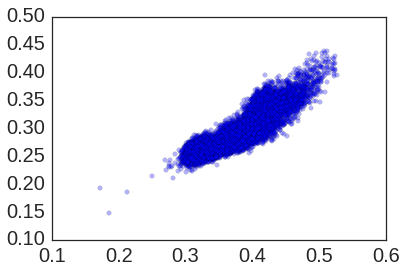

(array([  1.00000000e+00,   0.00000000e+00,   8.30000000e+01,
          1.63400000e+03,   4.59300000e+03,   4.52100000e+03,
          2.88800000e+03,   1.09500000e+03,   2.22000000e+02,
          1.40000000e+01]),
 array([-0.01955895, -0.0010511 ,  0.01745675,  0.0359646 ,  0.05447245,
         0.0729803 ,  0.09148815,  0.109996  ,  0.12850385,  0.1470117 ,
         0.16551955]),
 <a list of 10 Patch objects>)

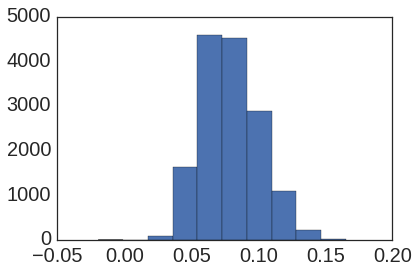

In [457]:
plt.scatter(nonparalog_long_dist, paralog_long_dist, alpha = .3)
plt.show()
plt.hist(nonparalog_long_dist - paralog_long_dist)

In [458]:
pop_colors = ['purply pink', 'golden', 'leaf green', 'blood', 'vomit', 'primary blue', 
              'bright sky blue', 'dark cyan', 'grey', 'red']
unit_colors = [sns.xkcd_rgb[pop_colors[x]] for x in paralog_df.index.labels[0].tolist()]

In [459]:
sns.xkcd_rgb['grey']

'#929591'

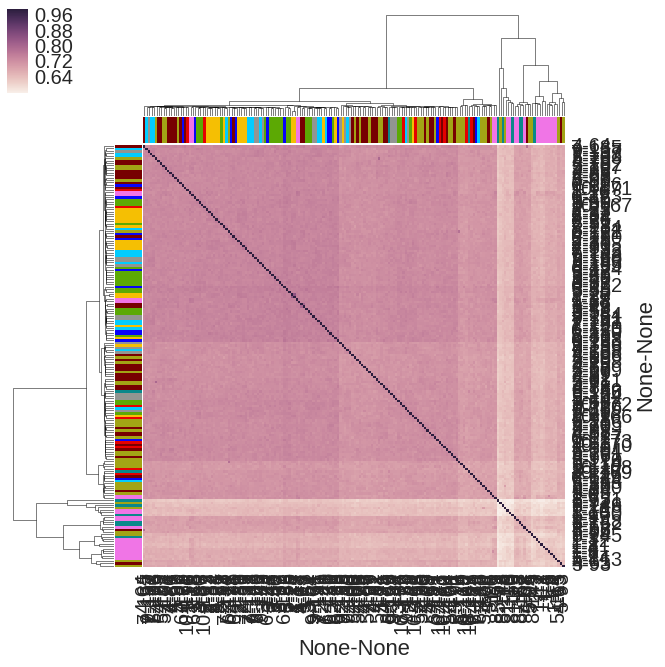

In [460]:
sns.clustermap(1-paralog_df,robust = False, row_colors= unit_colors, col_colors = unit_colors)

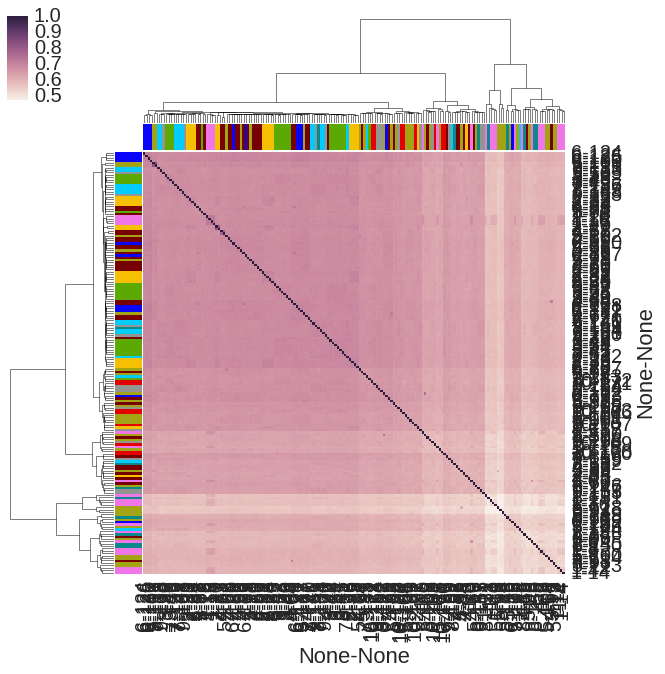

In [461]:
sns.clustermap(1-nonparalog_df,robust = False, row_colors= unit_colors, col_colors = unit_colors)

In [338]:
assert False

AssertionError: 

In [41]:
dom_freqs = dom_calls.groupby('pop').mean()
# drop Hoodsport
dom_freqs = dom_freqs.drop(10, axis = 0)
dom_freqs

,1,2,3,4,5,6,7,8,9,10,...,35570,35571,35572,35573,35574,35575,35576,35577,35578,35579
pop,,,,,,,,,,,,,,,,,,,,,
1,0.176471,1.000000,0.650000,1.000000,0.400000,0.950000,0.950000,0.300000,0.550000,0.850000,...,0.947368,0.157895,0.052632,0.947368,0.111111,1.000000,0.062500,0.625000,0.375000,0.375000
2,0.235294,0.941176,0.470588,1.000000,0.000000,0.941176,0.647059,0.764706,0.294118,0.941176,...,0.941176,0.529412,0.058824,1.000000,0.058824,1.000000,0.176471,0.764706,0.176471,0.588235
3,0.200000,1.000000,0.800000,1.000000,0.000000,0.800000,0.750000,0.800000,0.500000,0.900000,...,1.000000,0.400000,0.000000,1.000000,0.200000,1.000000,0.250000,0.650000,0.400000,0.450000
4,0.233333,0.966667,0.781250,1.000000,0.000000,0.687500,0.687500,0.687500,0.344828,0.965517,...,0.937500,0.375000,0.066667,1.000000,0.193548,1.000000,0.333333,0.600000,0.366667,0.566667
5,0.266667,1.000000,0.800000,0.966667,0.033333,0.766667,0.571429,0.857143,0.448276,0.931034,...,0.888889,0.444444,0.034483,0.965517,0.250000,1.000000,0.300000,0.566667,0.466667,0.366667
6,0.300000,1.000000,0.545455,1.000000,0.090909,0.818182,0.909091,1.000000,0.363636,0.909091,...,0.909091,0.272727,0.090909,1.000000,0.000000,1.000000,0.300000,0.400000,0.700000,0.300000
7,0.214286,1.000000,0.428571,1.000000,0.000000,0.857143,0.500000,0.785714,0.615385,0.923077,...,0.928571,0.357143,0.692308,0.769231,0.214286,0.928571,0.214286,0.714286,0.285714,0.214286
8,0.125000,1.000000,0.750000,1.000000,0.375000,1.000000,0.500000,0.625000,0.600000,1.000000,...,1.000000,0.333333,0.428571,0.714286,0.375000,0.875000,0.666667,0.666667,0.333333,0.000000
9,0.230769,1.000000,0.615385,0.923077,0.000000,0.846154,0.769231,0.615385,0.538462,0.769231,...,1.000000,0.200000,0.250000,0.916667,0.250000,0.916667,0.076923,0.538462,0.538462,0.461538


In [ ]:
# try it transposed
long_dist = scipy.spatial.distance.pdist(test_mat.T, 'hamming')
sq_dist = scipy.spatial.distance.squareform(long_dist)
sns.heatmap(sq_dist, square=True, robust = True)

KeyboardInterrupt: 

In [45]:
dom_freqs_T = dom_freqs.T
dom_freqs_T.head()

pop,1,2,3,4,5,6,7,8,9
1,0.176471,0.235294,0.2,0.233333,0.266667,0.300000,0.214286,0.125,0.230769
2,1.000000,0.941176,1.0,0.966667,1.000000,1.000000,1.000000,1.000,1.000000
3,0.650000,0.470588,0.8,0.781250,0.800000,0.545455,0.428571,0.750,0.615385
4,1.000000,1.000000,1.0,1.000000,0.966667,1.000000,1.000000,1.000,0.923077
5,0.400000,0.000000,0.0,0.000000,0.033333,0.090909,0.000000,0.375,0.000000


In [42]:
complete_dom_map = pd.read_csv(os.path.join('results','batch_4','EIGENSOFT','complete.dom.map'),sep = '\t', header = None)
complete_dom_map.columns = ['junkLG', 'domID', 'junk1', 'junk2']
complete_dom_map['stacks_CatID'] = [np.int(x.split('_')[0]) for x in complete_dom_map['domID']]
complete_dom_map['LFMM_ID'] = range(1, len(complete_dom_map)+1)
complete_dom_map.head()

,junkLG,domID,junk1,junk2,stacks_CatID,LFMM_ID
0,1,2_A,1,1,2,1
1,1,2_G,1,1,2,2
2,1,7_GG,1,1,7,3
3,1,7_TA,1,1,7,4
4,1,7_TG,1,1,7,5


In [48]:
dom_freqs_T = pd.merge(dom_freqs_T, complete_dom_map, left_index=True, right_on = 'LFMM_ID')

In [54]:
dom_freqs_T = dom_freqs_T.drop(['junkLG', 'junk1', 'junk2'], axis = 1)
dom_freqs_T.head()

pop,1,2,3,4,5,6,7,8,9,domID,stacks_CatID,LFMM_ID
0,0.176471,0.235294,0.2,0.233333,0.266667,0.300000,0.214286,0.125,0.230769,2_A,2,1
1,1.000000,0.941176,1.0,0.966667,1.000000,1.000000,1.000000,1.000,1.000000,2_G,2,2
2,0.650000,0.470588,0.8,0.781250,0.800000,0.545455,0.428571,0.750,0.615385,7_GG,7,3
3,1.000000,1.000000,1.0,1.000000,0.966667,1.000000,1.000000,1.000,0.923077,7_TA,7,4
4,0.400000,0.000000,0.0,0.000000,0.033333,0.090909,0.000000,0.375,0.000000,7_TG,7,5


In [83]:
idx_dom_freqs_T = dom_freqs_T.set_index(['stacks_CatID', 'domID', 'LFMM_ID'])
idx_dom_freqs_T.head(800)

pop                                     1         2         3         4  \
stacks_CatID domID      LFMM_ID                                           
2            2_A        1        0.176471  0.235294  0.200000  0.233333   
             2_G        2        1.000000  0.941176  1.000000  0.966667   
7            7_GG       3        0.650000  0.470588  0.800000  0.781250   
             7_TA       4        1.000000  1.000000  1.000000  1.000000   
             7_TG       5        0.400000  0.000000  0.000000  0.000000   
             7_GA       6        0.950000  0.941176  0.800000  0.687500   
9            9_C        7        0.950000  0.647059  0.750000  0.687500   
             9_A        8        0.300000  0.764706  0.800000  0.687500   
15           15_G       9        0.550000  0.294118  0.500000  0.344828   
             15_T       10       0.850000  0.941176  0.900000  0.965517   
16           16_GAA     11       0.900000  0.882353  1.000000  0.812500   
             16_GAG     12       0.850000  0.588235  0.750000  0.687500   
             16_ACA     13       0.000000  0.000000  0.000000  0.000000   
21           21_TGG     14       0.550000  0.823529  1.000000  0.750000   
             21_ACA     15       0.950000  0.705882  0.400000  0.750000   
22           22_AGAC    16       0.500000  0.529412  0.500000  0.500000   
             22_CGAC    17       0.000000  0.000000  0.000000  0.062500   
             22_CAGT    18       0.888889  0.941176  0.950000  0.937500   
             22_CGGT    19       0.000000  0.058824  0.050000  0.000000   
25           25_TG      20       0.133333  0.687500  0.333333  0.689655   
             25_CG      21       0.533333  0.187500  0.333333  0.517241   
             25_CA      22       0.666667  0.250000  0.555556  0.379310   
26           26_GCGT    23       1.000000  1.000000  1.000000  1.000000   
             26_ATAA    24       0.000000  0.235294  0.000000  0.156250   
28           28_TG      25       0.894737  1.000000  1.000000  1.000000   
             28_AC      26       0.210526  0.235294  0.150000  0.218750   
30           30_AC      27       0.105263  0.647059  0.300000  0.187500   
             30_TG      28       0.210526  0.000000  0.050000  0.250000   
             30_TC      29       1.000000  0.882353  1.000000  0.906250   
31           31_A       30       1.000000  1.000000  0.950000  0.937500   
...                                   ...       ...       ...       ...   
1203         1203_GTTC  771      1.000000  1.000000  1.000000  1.000000   
             1203_GCCT  772      0.250000  0.117647  0.350000  0.733333   
1209         1209_C     773      0.368421  0.294118  0.650000  0.607143   
             1209_A     774      1.000000  0.941176  0.900000  0.821429   
1211         1211_C     775      1.000000  1.000000  1.000000  1.000000   
             1211_T     776      0.000000  0.071429  0.111111  0.214286   
1212         1212_G     777      0.900000  0.705882  0.900000  0.593750   
             1212_T     778      0.600000  0.588235  0.500000  0.625000   
1219         1219_AC    779      0.700000  0.176471  0.550000  0.562500   
             1219_AA    780      0.600000  0.764706  0.550000  0.562500   
             1219_GC    781      0.250000  0.411765  0.450000  0.437500   
1221         1221_CT    782      0.050000  0.000000  0.100000  0.187500   
             1221_AT    783      0.850000  0.823529  0.850000  0.937500   
             1221_AG    784      0.600000  0.647059  0.650000  0.531250   
1223         1223_G     785      0.421053  0.235294  0.473684  0.290323   
             1223_T     786      0.842105  1.000000  1.000000  0.967742   
1225         1225_C     787      0.769231  0.705882  0.750000  0.903226   
             1225_T     788      0.692308  0.705882  0.750000  0.354839   
1226         1226_C     789      1.000000  0.941176  1.000000  0.967742   
             1226_A     790      0.055556  0.117647  0.350000  0.225806   
1240         1240_T     7

In [80]:
dom_freqs_T.groupby('stacks_CatID').sum().drop('LFMM_ID',1)

pop,1,2,3,4,5,6,7,8,9
stacks_CatID,,,,,,,,,
2,1.176471,1.176471,1.200000,1.200000,1.266667,1.300000,1.214286,1.125000,1.230769
7,3.000000,2.411765,2.600000,2.468750,2.566667,2.454545,2.285714,3.125000,2.384615
9,1.250000,1.411765,1.550000,1.375000,1.428571,1.909091,1.285714,1.125000,1.384615
15,1.400000,1.235294,1.400000,1.310345,1.379310,1.272727,1.538462,1.600000,1.307692
16,1.750000,1.470588,1.750000,1.500000,1.586207,1.454545,1.642857,1.285714,1.384615
21,1.500000,1.529412,1.400000,1.500000,1.483871,1.636364,1.428571,1.750000,1.461538
22,1.388889,1.529412,1.500000,1.500000,1.400000,1.272727,1.428571,1.500000,1.416667
25,1.333333,1.125000,1.222222,1.586207,1.259259,1.636364,1.461538,1.142857,1.230769
26,1.000000,1.235294,1.000000,1.156250,1.129032,1.090909,1.000000,1.250000,1.272727


In [71]:
idx_dom_freqs_T.sum(axis=1)

stacks_CatID
2            2.981820
2           10.907843
7            8.841249
7           12.889744
7            5.899242
7           13.666822
9           13.284309
9           14.435448
15          13.254704
15          18.189127
16          19.446501
16          17.301103
16          13.076923
21          20.932821
21          21.756935
22          21.203005
22          17.062500
22          25.495271
22          19.175490
25          25.133717
25          23.871848
25          25.991985
26          31.660924
26          25.473289
28          33.894737
28          27.441240
30          29.773788
30          29.490671
30          37.318573
31          38.145786
             ...     
80621    35557.790423
80678    35552.682372
80678    35560.851103
80771    35555.559585
80771    35562.746032
80801    35557.955032
80801    35563.567698
80816    35564.222454
80816    35566.551836
80824    35563.875817
80824    35566.703020
81079    35566.735668
81079    35568.396075
81170    35563.8624

In [5]:
allele_matrix = allele_matrix.values.astype(np.float)
allele_matrix

array([[  1.,   1.,   1., ...,   1.,   0.,   0.],
       [  0.,   1.,   1., ...,   1.,   0.,   0.],
       [  0.,   1.,   1., ...,  nan,  nan,  nan],
       ..., 
       [  1.,   1.,   0., ...,   1.,   0.,   1.],
       [  0.,   1.,   0., ...,   0.,   0.,   1.],
       [  0.,   1.,   1., ...,   1.,   0.,   0.]])

### Impute missing values
replaced with overall column mean 

In [6]:
imp = preprocessing.Imputer(missing_values='NaN', strategy='mean', axis=0)
imp_allele_matrix = imp.fit_transform(allele_matrix)

In [7]:
pd.DataFrame(imp_allele_matrix).head()

,0,1,2,3,4,5,6,7,8,9,...,35569,35570,35571,35572,35573,35574,35575,35576,35577,35578
0,1,1,1,1,1,1,1,1,0,1,...,1.00000,0.000000,0,1,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
1,0,1,1,1,1,1,1,0,0,1,...,0.93865,0.355828,0,1,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
2,0,1,1,1,1,1,1,1,0,1,...,1.00000,0.000000,0,1,0.000000,1.000000,0.245399,0.625767,0.380368,0.423313
3,0,1,1,1,1,1,1,0,0,1,...,1.00000,0.000000,0,1,0.174699,0.981928,0.000000,0.000000,1.000000,0.000000
4,0,1,0,1,0,1,1,1,0,1,...,1.00000,0.000000,0,1,0.000000,1.000000,0.245399,0.625767,0.380368,0.423313


In [8]:
imp_allele_df = pd.DataFrame(imp_allele_matrix)
imp_allele_df.shape

(174, 35579)

In [9]:
ped_genotypes = '/home/ipseg/Desktop/waples/chum_populations/data/batch_4/pop_genotypes/non_paralogs.ped'
ped_genotypes = pd.read_csv(ped_genotypes, sep = ' ', header = None)
ped_genotypes = ped_genotypes.iloc[:,:2]
ped_genotypes.columns = ['pop', 'ind']
ped_genotypes.head()

,pop,ind
0,1,CMHAMM10_0002
1,1,CMHAMM10_0005
2,1,CMHAMM10_0008
3,1,CMHAMM10_0011
4,1,CMHAMM10_0012


In [10]:
ped_dom_freqs = pd.merge(ped_genotypes[['pop']], imp_allele_df, left_index=True, right_index=True).groupby('pop').mean()
ped_dom_freqs.head()

,0,1,2,3,4,5,6,7,8,9,...,35569,35570,35571,35572,35573,35574,35575,35576,35577,35578
pop,,,,,,,,,,,,,,,,,,,,,
1,0.184132,0.998204,0.650000,1.000000,0.400000,0.950000,0.950000,0.300000,0.550000,0.850000,...,0.946933,0.167791,0.057055,0.947239,0.117470,0.998193,0.099080,0.625153,0.376074,0.384663
2,0.235294,0.941176,0.470588,1.000000,0.000000,0.941176,0.647059,0.764706,0.294118,0.941176,...,0.941176,0.529412,0.058824,1.000000,0.058824,1.000000,0.176471,0.764706,0.176471,0.588235
3,0.200000,1.000000,0.800000,1.000000,0.000000,0.800000,0.750000,0.800000,0.500000,0.900000,...,1.000000,0.400000,0.000000,1.000000,0.200000,1.000000,0.250000,0.650000,0.400000,0.450000
4,0.232972,0.968001,0.781250,1.000000,0.000000,0.687500,0.687500,0.687500,0.355114,0.960795,...,0.937500,0.375000,0.071319,0.996549,0.192959,0.999435,0.327837,0.601610,0.367523,0.557707
5,0.265405,0.999614,0.795637,0.967369,0.034682,0.768413,0.583475,0.843237,0.448680,0.930010,...,0.895310,0.433010,0.041362,0.964180,0.242713,0.998251,0.298239,0.568573,0.463883,0.368494


## Do some cleanup here:
drop non-variable alleles
drop pop 10 - hoodsport

In [11]:
ped_dom_freqs_T = ped_dom_freqs.T.drop(10, axis = 1)
ped_dom_freqs = ped_dom_freqs_T.T
ped_dom_freqs

,0,1,2,3,4,5,6,7,8,9,...,35569,35570,35571,35572,35573,35574,35575,35576,35577,35578
pop,,,,,,,,,,,,,,,,,,,,,
1,0.184132,0.998204,0.650000,1.000000,0.400000,0.950000,0.950000,0.300000,0.550000,0.850000,...,0.946933,0.167791,0.057055,0.947239,0.117470,0.998193,0.099080,0.625153,0.376074,0.384663
2,0.235294,0.941176,0.470588,1.000000,0.000000,0.941176,0.647059,0.764706,0.294118,0.941176,...,0.941176,0.529412,0.058824,1.000000,0.058824,1.000000,0.176471,0.764706,0.176471,0.588235
3,0.200000,1.000000,0.800000,1.000000,0.000000,0.800000,0.750000,0.800000,0.500000,0.900000,...,1.000000,0.400000,0.000000,1.000000,0.200000,1.000000,0.250000,0.650000,0.400000,0.450000
4,0.232972,0.968001,0.781250,1.000000,0.000000,0.687500,0.687500,0.687500,0.355114,0.960795,...,0.937500,0.375000,0.071319,0.996549,0.192959,0.999435,0.327837,0.601610,0.367523,0.557707
5,0.265405,0.999614,0.795637,0.967369,0.034682,0.768413,0.583475,0.843237,0.448680,0.930010,...,0.895310,0.433010,0.041362,0.964180,0.242713,0.998251,0.298239,0.568573,0.463883,0.368494
6,0.293413,0.998911,0.545455,1.000000,0.090909,0.818182,0.909091,1.000000,0.363636,0.909091,...,0.909091,0.272727,0.090909,1.000000,0.000000,1.000000,0.295036,0.420524,0.670943,0.311210
7,0.214286,1.000000,0.428571,1.000000,0.000000,0.857143,0.500000,0.785714,0.603896,0.922511,...,0.928571,0.357143,0.652936,0.781770,0.214286,0.928571,0.214286,0.714286,0.285714,0.214286
8,0.125000,1.000000,0.750000,1.000000,0.375000,1.000000,0.500000,0.625000,0.545455,0.968182,...,0.984663,0.338957,0.392638,0.743098,0.375000,0.875000,0.561350,0.656442,0.345092,0.105828
9,0.230769,1.000000,0.615385,0.923077,0.000000,0.846154,0.769231,0.615385,0.538462,0.769231,...,0.985842,0.235960,0.241623,0.918830,0.244208,0.921687,0.076923,0.538462,0.538462,0.461538


### Now we have our data in two forms
    1) individual presence/absenece data
    2) population allele frequencies

### Kullback–Leibler divergence 
compare each genotype to the overall mean

In [12]:
def get_KL(freq_DF):
    KL_divergence = dict()
    for idx, vals in freq_DF.T.iterrows():
        vals = vals.values
        kl1 =  scipy.stats.entropy(vals, np.tile(np.mean(vals), len(vals)))
        vals = 1 - vals
        kl2 =  scipy.stats.entropy(vals, np.tile(np.mean(vals), len(vals)))
        #if np.isfinite(kl1 + kl2):
        KL_divergence[idx+1] = kl1 + kl2
    return(KL_divergence)

In [13]:
pop_KL = get_KL(ped_dom_freqs)
ind_KL = get_KL(imp_allele_df)

In [16]:
pop_KL

{1: 0.0244430939851982,
 2: 1.3872232622903864,
 3: 0.095937380184851012,
 4: 1.5885174488828795,
 5: 1.1314571878394422,
 6: 0.25218443215702696,
 7: 0.17531814654184663,
 8: 0.26679327515019763,
 9: 0.041925886293436229,
 10: 0.17360221541817877,
 11: 0.56057146516049228,
 12: 0.12648142172682919,
 13: 2.113892774128586,
 14: 0.22524053709232994,
 15: 0.26175264710032409,
 16: 0.079220858481343678,
 17: 1.8252057162605293,
 18: 0.25688644394769483,
 19: 0.89863436630007576,
 20: 0.12271401539376478,
 21: 0.17965949635097112,
 22: 0.066423341955723608,
 23: 1.2056519889119,
 24: 0.44137026832530163,
 25: 1.9986733669319388,
 26: 0.059768053219729458,
 27: 0.13220736103843711,
 28: 0.26933916139845748,
 29: 0.73526750907130556,
 30: 0.68363439968818618,
 31: 0.085404919504509527,
 32: 0.16362057950022635,
 33: 0.14928929532440283,
 34: 0.13656210007404995,
 35: 0.077520448137508122,
 36: 1.5225892955183573,
 37: 2.0721935123478588,
 38: 0.086098903102593549,
 39: inf,
 40: 0.0757535034

ValueError: The first argument of bincount must be non-negative

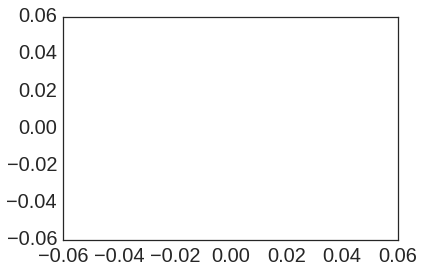

In [15]:
sns.distplot(pop_KL.values())
plt.show()
sns.distplot(ind_KL.values())
plt.show()

/home/ipseg/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


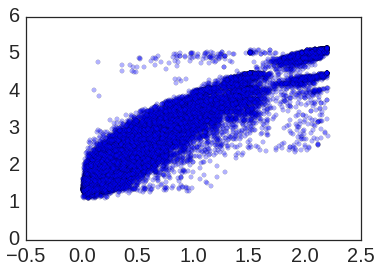

In [17]:
plt.scatter(pop_KL.values(), ind_KL.values(), alpha = .3)

In [18]:
import operator
sorted(KL_divergence.items(), key=operator.itemgetter(1), reverse=True)[:8]

NameError: name 'KL_divergence' is not defined

In [19]:
ped_dom_freqs

,0,1,2,3,4,5,6,7,8,9,...,35569,35570,35571,35572,35573,35574,35575,35576,35577,35578
pop,,,,,,,,,,,,,,,,,,,,,
1,0.184132,0.998204,0.650000,1.000000,0.400000,0.950000,0.950000,0.300000,0.550000,0.850000,...,0.946933,0.167791,0.057055,0.947239,0.117470,0.998193,0.099080,0.625153,0.376074,0.384663
2,0.235294,0.941176,0.470588,1.000000,0.000000,0.941176,0.647059,0.764706,0.294118,0.941176,...,0.941176,0.529412,0.058824,1.000000,0.058824,1.000000,0.176471,0.764706,0.176471,0.588235
3,0.200000,1.000000,0.800000,1.000000,0.000000,0.800000,0.750000,0.800000,0.500000,0.900000,...,1.000000,0.400000,0.000000,1.000000,0.200000,1.000000,0.250000,0.650000,0.400000,0.450000
4,0.232972,0.968001,0.781250,1.000000,0.000000,0.687500,0.687500,0.687500,0.355114,0.960795,...,0.937500,0.375000,0.071319,0.996549,0.192959,0.999435,0.327837,0.601610,0.367523,0.557707
5,0.265405,0.999614,0.795637,0.967369,0.034682,0.768413,0.583475,0.843237,0.448680,0.930010,...,0.895310,0.433010,0.041362,0.964180,0.242713,0.998251,0.298239,0.568573,0.463883,0.368494
6,0.293413,0.998911,0.545455,1.000000,0.090909,0.818182,0.909091,1.000000,0.363636,0.909091,...,0.909091,0.272727,0.090909,1.000000,0.000000,1.000000,0.295036,0.420524,0.670943,0.311210
7,0.214286,1.000000,0.428571,1.000000,0.000000,0.857143,0.500000,0.785714,0.603896,0.922511,...,0.928571,0.357143,0.652936,0.781770,0.214286,0.928571,0.214286,0.714286,0.285714,0.214286
8,0.125000,1.000000,0.750000,1.000000,0.375000,1.000000,0.500000,0.625000,0.545455,0.968182,...,0.984663,0.338957,0.392638,0.743098,0.375000,0.875000,0.561350,0.656442,0.345092,0.105828
9,0.230769,1.000000,0.615385,0.923077,0.000000,0.846154,0.769231,0.615385,0.538462,0.769231,...,0.985842,0.235960,0.241623,0.918830,0.244208,0.921687,0.076923,0.538462,0.538462,0.461538


## These may need to be adapted to single dominant alleles

In [192]:
def construct_multilocus_genotypes(allele_freqs_df, use_genotypes):
    num_pops = len(allele_freqs_df)
    num_loci = allele_freqs_df.shape[1]
    p_freqs = np.asanyarray(allele_freqs_df)
    q_freqs = np.asanyarray(1.0 - allele_freqs_df)
    
    if use_genotypes: # use diploid genotypes - (3 effective 'alleles')
        p_sq = np.asanyarray(p_freqs**2)
        pq   = np.asanyarray(2 * p_freqs * q_freqs)
        q_sq = np.asanyarray(q_freqs**2)
        unit_frequencies = (p_sq, pq, q_sq)
    elif use_genotypes is False: # use singular alleles (2 effective alleles)
        unit_frequencies = (p_freqs, q_freqs)
    
    mlg = np.zeros(shape = (num_pops, len(unit_frequencies) ** num_loci), dtype = np.float64)
    col_idx = 0
    for ml_genotype in itertools.product(unit_frequencies, repeat = num_loci):
        # these next two lines are where the calculation get slow
        geno = np.asarray([ml_genotype[xx][:,xx] for xx in range(num_loci)]).T
        genotype_probs = np.product(a = geno, axis = 1, keepdims = False)
        mlg[:,col_idx] = genotype_probs
        col_idx += 1
    return(mlg)

In [193]:
def multilocus_In(allele_freqs_df, use_genotypes = True):
    assert len(allele_freqs_df) >= 2
    num_pops = len(allele_freqs_df)
    #num_loci = allele_freqs_df.shape[1]
    #p_sq, pq, q_sq = calculate_genotype_freqs(allele_freqs_df)
    mlg = construct_multilocus_genotypes(allele_freqs_df, use_genotypes = use_genotypes)
    assert np.allclose(np.sum(mlg), num_pops) # allele freqs from each pop should add up to one.
    I_n = 0
    # the average case
    I_n += np.nansum([-np.mean(mlg, axis = 0) * np.log(np.mean(mlg, axis = 0)) ])
    # accounting for different freqs in different pops
    I_n += np.nansum(mlg * np.log(mlg)/num_pops)
    return (I_n, mlg)

In [199]:
ped_dom_freqs[[5,3]]

,5,3
pop,,
1,0.950000,1.000000
2,0.941176,1.000000
3,0.800000,1.000000
4,0.687500,1.000000
5,0.768413,0.967369
6,0.818182,1.000000
7,0.857143,1.000000
8,1.000000,1.000000
9,0.846154,0.923077


In [216]:
my_In, my_mlg = multilocus_In(ped_dom_freqs[[5]], use_genotypes=False)
my_In 

0.040495731845321514

In [218]:
ped_dom_freqs[[5]]

,5
pop,
1,0.950000
2,0.941176
3,0.800000
4,0.687500
5,0.768413
6,0.818182
7,0.857143
8,1.000000
9,0.846154


In [217]:
my_mlg

array([[ 0.95      ,  0.05      ],
       [ 0.94117647,  0.05882353],
       [ 0.8       ,  0.2       ],
       [ 0.6875    ,  0.3125    ],
       [ 0.7684132 ,  0.2315868 ],
       [ 0.81818182,  0.18181818],
       [ 0.85714286,  0.14285714],
       [ 1.        ,  0.        ],
       [ 0.84615385,  0.15384615],
       [ 0.75      ,  0.25      ]])

## By population frequency 

In [203]:
informativeness = [multilocus_In(ped_dom_freqs[[locus]])[0] for locus in ped_dom_freqs.columns]
informativeness = np.array(informativeness)
sum(informativeness)

2974.3241933262652

In [214]:
info = pd.DataFrame(informativeness)
info.columns = ['info']
info['LFMM_ID'] = info.index+1
info.to_csv(os.path.join('results', 'batch_4', 'LFMM', 'info.txt'), index = False, sep = '\t')

## By individual

In [221]:
ind_informativeness = [multilocus_In(imp_allele_df.T[[locus]])[0] for locus in imp_allele_df.T.columns]
ind_informativeness = np.array(ind_informativeness)

In [224]:
ind_info = pd.DataFrame(ind_informativeness)
ind_info.columns = ['ind_info']
ind_info['LFMM_ID'] = ind_info.index+1
ind_info.to_csv(os.path.join('results', 'batch_4', 'LFMM', 'ind_info.txt'), index = False, sep = '\t')

In [206]:
KL_diverge = pd.DataFrame.from_dict(KL_divergence, orient = 'index').reset_index()
KL_diverge.columns = ['LFMM_ID', 'KL']
KL_diverge.to_csv(os.path.join('results', 'batch_4', 'LFMM', 'KL.txt'), index = False, sep = '\t')

2974.3241933262652

In [187]:
testvals = ped_dom_freqs[1383].values
scipy.stats.entropy(testvals, np.tile(np.mean(testvals), len(testvals)))

2.3025850929940463

In [226]:
testvals = 1- ped_dom_freqs[35561-1].values
scipy.stats.entropy(testvals, np.tile(np.mean(testvals), len(testvals)))

0.14647634209024391

In [225]:
ped_dom_freqs[35561-1].values

array([ 0.8       ,  0.56958393,  0.75      ,  0.82393293,  0.84028324,
        0.81818182,  0.33449477,  0.625     ,  0.25891182,  0.46036585])

In [186]:
scipy.stats.power_divergence(1-ped_dom_freqs[1383], lambda_='log-likelihood')[0]/2

0.0011595771867149371

In [184]:
ped_dom_freqs[1383]

pop
1     0.050289
2     0.000000
3     0.000000
4     0.000000
5     0.000000
6     0.000000
7     0.000000
8     0.000000
9     0.000000
10    0.000000
Name: 1383, dtype: float64

In [183]:
scipy.stats.power_divergence(ped_dom_freqs[1383], lambda_='log-likelihood')[0]/4 + (
scipy.stats.power_divergence(1-ped_dom_freqs[1383], lambda_='log-likelihood')[0]/4
)


0.058477159428756892

In [145]:
KL_divergence = dict()
for idx, vals in ped_dom_freqs_T.iterrows():
    vals = vals.values
    kl1 =  scipy.stats.entropy(vals, np.tile(np.mean(vals), len(vals)))
    vals = 1 - vals
    kl2 =  scipy.stats.entropy(vals, np.tile(np.mean(vals), len(vals)))
    if np.isfinite(kl1 + kl2):
        KL_divergence[idx+1] = kl1 + kl2

In [160]:
KL_diverge = pd.DataFrame.from_dict(KL_divergence, orient = 'index').reset_index()
KL_diverge.columns = ['LFMM_ID', 'KL']
KL_diverge.to_csv(os.path.join('results', 'batch_4', 'LFMM', 'KL.txt'), index = False, sep = '\t')

In [139]:
sorted(KL_divergence.items(), key=operator.itemgetter(1), reverse=True)

[(8727, 2.2057259577517012),
 (23956, 2.2048315561431182),
 (34108, 2.199867747753053),
 (16790, 2.1989683639069608),
 (19252, 2.1985025339675137),
 (22362, 2.1984872974116403),
 (32886, 2.1983071109574421),
 (2666, 2.1981119183898441),
 (1778, 2.1980457524324852),
 (16487, 2.1980457524324852),
 (19424, 2.1980457524324852),
 (23777, 2.1980457524324852),
 (23780, 2.1980457524324852),
 (23805, 2.1980457524324852),
 (23806, 2.1980457524324852),
 (14676, 2.1979492371169758),
 (26928, 2.1979492371169758),
 (7729, 2.1977496138632229),
 (1744, 2.1977434437666994),
 (29245, 2.1977434437666994),
 (23298, 2.197717406224688),
 (10834, 2.1976791680400614),
 (16404, 2.1976791680400614),
 (32320, 2.1976564839090225),
 (2317, 2.1976514202487762),
 (3492, 2.1976514202487762),
 (3929, 2.1976514202487762),
 (14373, 2.1976514202487762),
 (2398, 2.1976514202487758),
 (4582, 2.1976514202487758),
 (13191, 2.1976514202487758),
 (13552, 2.1976514202487758),
 (902, 2.1975316487453256),
 (2186, 2.19752804092345

In [140]:
nmf = decomposition.NMF(init = 'random', n_components = 5, max_iter = 1000, alpha = .5, l1_ratio = .5)
nmf_fit = nmf.fit(imp_allele_matrix.T)

KeyboardInterrupt: 

In [10]:
nmf_fit.components_.shape

(5, 174)

In [11]:
pd.DataFrame(nmf_fit.components_)

,0,1,2,3,4,5,6,7,8,9,...,164,165,166,167,168,169,170,171,172,173
0,0.245432,1.347162,1.165097,1.546069,1.385027,1.622902,1.200078,1.529943,1.603312,1.342869,...,7.202181,7.125327,2.756992,2.591454,2.180265,2.322284,2.030806,2.300135,2.311976,1.996335
1,0.575776,0.646116,1.351188,0.830540,0.725158,0.231555,0.577616,0.547513,0.783221,0.804274,...,1.359279,1.194493,1.520822,1.866544,1.969409,1.564236,1.784857,2.173182,1.723538,2.689934
2,1.277955,0.528152,0.473642,0.070336,0.474530,0.329974,0.609713,0.476840,0.371916,0.374265,...,0.000000,0.074285,6.353487,5.862288,5.830200,5.719471,6.157021,6.713499,7.185123,5.818183
3,0.411200,1.004086,0.595255,0.552465,0.677400,0.509147,0.343135,0.732611,0.822841,0.768629,...,0.420511,0.212713,0.027381,0.181962,0.090893,0.078217,0.193999,0.149329,0.000000,0.000000
4,9.045245,7.213652,7.817616,7.905075,7.916442,8.564316,8.654790,8.000881,7.565109,7.967329,...,0.418177,0.856376,0.277546,0.469189,0.709006,1.045347,0.948901,0.402753,0.307621,0.999590


In [12]:
comps = pd.concat([ped_genotypes, pd.DataFrame(nmf_fit.components_.T)], axis = 1)
comps = comps.rename(columns = {0:'first', 1:'second', 2:'third', 3:'fourth', 4:'fifth', 5:'sixth' })
comps.head()

,pop,ind,first,second,third,fourth,fifth
0,1,CMHAMM10_0002,0.245432,0.575776,1.277955,0.411200,9.045245
1,1,CMHAMM10_0005,1.347162,0.646116,0.528152,1.004086,7.213652
2,1,CMHAMM10_0008,1.165097,1.351188,0.473642,0.595255,7.817616
3,1,CMHAMM10_0011,1.546069,0.830540,0.070336,0.552465,7.905075
4,1,CMHAMM10_0012,1.385027,0.725158,0.474530,0.677400,7.916442


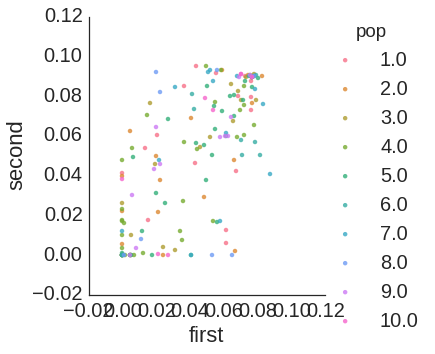

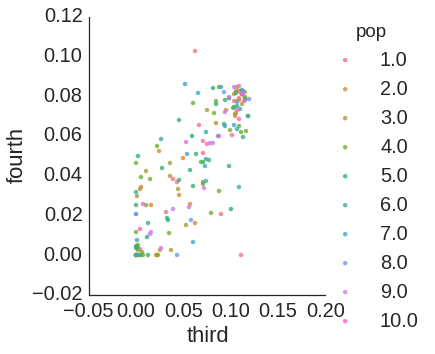

KeyError: "['sixth'] not in index"

In [101]:
sns.lmplot(data = comps, x = 'first', y = 'second', hue = 'pop', fit_reg=False)
plt.show()
sns.lmplot(data = comps, x = 'third', y = 'fourth', hue = 'pop', fit_reg=False)
plt.show()
sns.lmplot(data = comps, x = 'fifth', y = 'sixth', hue = 'pop', fit_reg=False)

In [ ]:
allele_matrix.values.astype(np.float)

In [ ]:
preprocessing.scale(lfmm_dom_in.values.astype(np.float))